In [ ]:
!ls


restaurant_sales.zip  sample_data


In [ ]:
!unzip restaurant_sales.zip

Archive:  restaurant_sales.zip
  inflating: restaurant_sales_data.csv  


In [ ]:
!ls

restaurant_sales_data.csv  restaurant_sales.zip  sample_data


Import Libraries

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

sns.set(style="whitegrid")  # For nicer plots



In [24]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Load CSV

In [25]:
# Load restaurant sales data
restaurant_sales_data = pd.read_csv('restaurant_sales_data.csv')

# Preview first 5 rows
restaurant_sales_data.head()


,Order ID,Customer ID,Category,Item,Price,Quantity,Order Total,Order Date,Payment Method
0,ORD_705844,CUST_092,Side Dishes,Side Salad,3.0,1.0,3.0,2023-12-21,Credit Card
1,ORD_338528,CUST_021,Side Dishes,Mashed Potatoes,4.0,3.0,12.0,2023-05-19,Digital Wallet
2,ORD_443849,CUST_029,Main Dishes,Grilled Chicken,15.0,4.0,60.0,2023-09-27,Credit Card
3,ORD_630508,CUST_075,Drinks,NaN,NaN,2.0,5.0,2022-08-09,Credit Card
4,ORD_648269,CUST_031,Main Dishes,Pasta Alfredo,12.0,4.0,48.0,2022-05-15,Cash


Explore the Data

In [26]:
#Explore data
#Column info, data types, missing values
restaurant_sales_data.info()

# Summary statistics for numeric columns
restaurant_sales_data.describe()

# Check for duplicates
restaurant_sales_data.duplicated().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17534 entries, 0 to 17533
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Order ID        17534 non-null  object 
 1   Customer ID     17534 non-null  object 
 2   Category        17534 non-null  object 
 3   Item            15776 non-null  object 
 4   Price           16658 non-null  float64
 5   Quantity        17104 non-null  float64
 6   Order Total     17104 non-null  float64
 7   Order Date      17534 non-null  object 
 8   Payment Method  16452 non-null  object 
dtypes: float64(3), object(6)
memory usage: 1.2+ MB


np.int64(0)

Clean the Data

In [27]:
#Clean data
# Remove duplicate rows
restaurant_sales_data = restaurant_sales_data.drop_duplicates()

# Convert 'Order Date' to datetime format
restaurant_sales_data['Order Date'] = pd.to_datetime(restaurant_sales_data['Order Date'])

# Fill missing numeric values with 0
restaurant_sales = restaurant_sales_data.fillna(0)

Exploratory Data Analysis

In [28]:
# Total sales
total_restaurant_sales_data = restaurant_sales_data['Order Total'].sum()
print(f"Total Sales: ₹{total_restaurant_sales_data:.2f}")

# Sales by Category
sales_by_category = restaurant_sales_data.groupby('Category')['Order Total'].sum().sort_values(ascending=False)
print(sales_by_category)

# Top 10 Most Popular Menu Items
top_menu_items = restaurant_sales_data.groupby('Item')['Quantity'].sum().sort_values(ascending=False)
print(top_menu_items.head(10))


Total Sales: ₹340617.50
Category
Main Dishes    160553.0
Starters        60044.0
Desserts        56883.0
Side Dishes     40549.0
Drinks          22588.5
Name: Order Total, dtype: float64
Item
Pasta Alfredo      3094.0
Side Salad         2932.0
Ice Cream          2929.0
Water              2899.0
French Fries       2721.0
Grilled Chicken    2492.0
Mashed Potatoes    2374.0
Chocolate Cake     2348.0
Coca Cola          2282.0
Cheese Fries       2061.0
Name: Quantity, dtype: float64


Visualizations

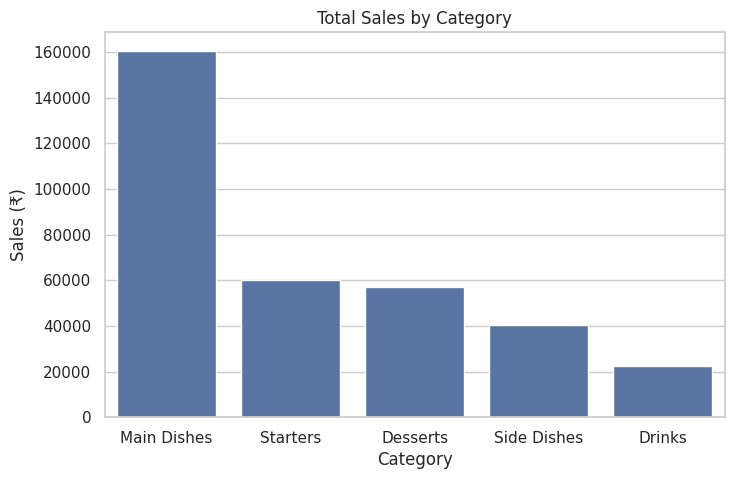

In [30]:
# Sales by Category
plt.figure(figsize=(8,5))
sns.barplot(x=sales_by_category.index, y=sales_by_category.values)
plt.title("Total Sales by Category")
plt.ylabel("Sales (₹)")
plt.xlabel("Category")
plt.show()




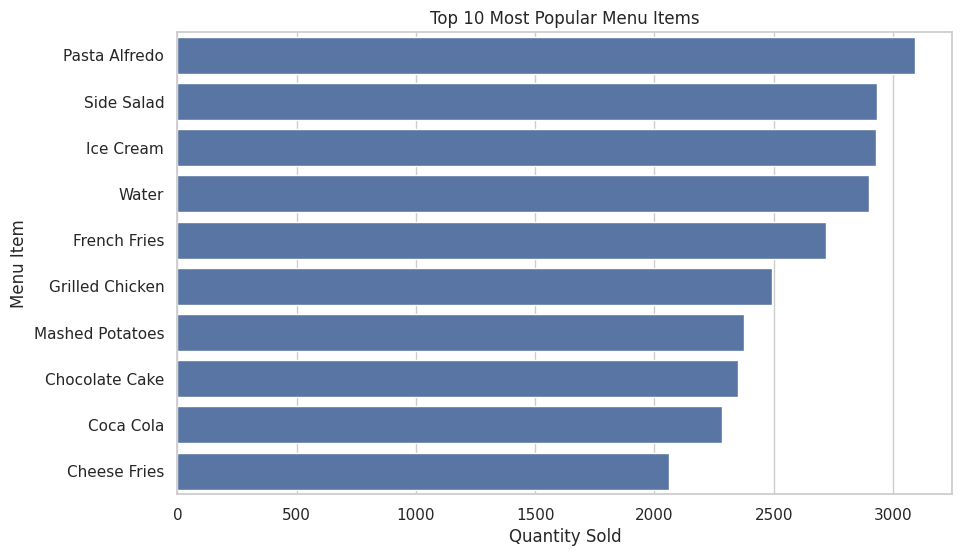

In [31]:
# Top 10 Menu Items by Quantity Sold
plt.figure(figsize=(10,6))
sns.barplot(x=top_menu_items.head(10).values, y=top_menu_items.head(10).index)
plt.title("Top 10 Most Popular Menu Items")
plt.xlabel("Quantity Sold")
plt.ylabel("Menu Item")
plt.show()

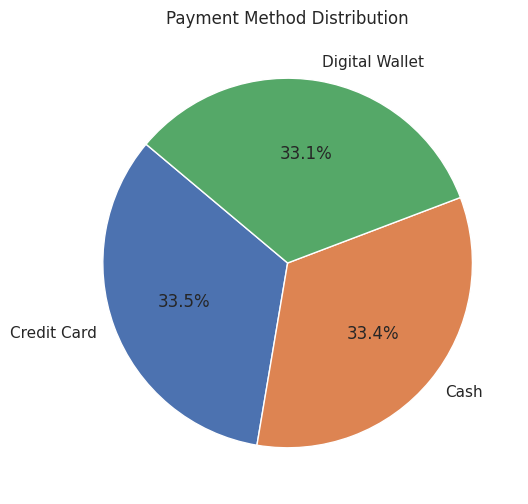

In [32]:
# Payment Method Distribution
plt.figure(figsize=(6,6))
restaurant_sales_data['Payment Method'].value_counts().plot.pie(autopct='%1.1f%%', startangle=140)
plt.title("Payment Method Distribution")
plt.ylabel("")
plt.show()

Prepare Data for Machine Learning

In [33]:
# Order Date column-a datetime format-ku convert pannunga
restaurant_sales_data['Order Date'] = pd.to_datetime(
    restaurant_sales_data['Order Date'],
    errors='coerce'
)

# Aggregate total sales by day
daily_sales_data = (
    restaurant_sales_data
    .groupby('Order Date')['Order Total']
    .sum()
    .reset_index()
    .sort_values('Order Date')
)

# Extract features
daily_sales_data['Day'] = daily_sales_data['Order Date'].dt.day
daily_sales_data['Month'] = daily_sales_data['Order Date'].dt.month
daily_sales_data['Weekday'] = daily_sales_data['Order Date'].dt.weekday

# Features (X) and Target (y)
features_sales = daily_sales_data[['Day', 'Month', 'Weekday']]
target_sales = daily_sales_data['Order Total']





In [34]:
#Train-Test Split

features_train, features_test, target_train, target_test = train_test_split(
    features_sales, target_sales, test_size=0.2, random_state=42
)


In [35]:
#Train Linear Regression Model

sales_predictor = LinearRegression()
sales_predictor.fit(features_train, target_train)


LinearRegression()

In [36]:
#Predict and Evaluate

predicted_daily_sales = sales_predictor.predict(features_test)

# Evaluate
mse_sales = mean_squared_error(target_test, predicted_daily_sales)
r2_sales = r2_score(target_test, predicted_daily_sales)
print(f"Mean Squared Error: {mse_sales:.2f}")
print(f"R² Score: {r2_sales:.2f}")


Mean Squared Error: 17579.53
R² Score: -0.07


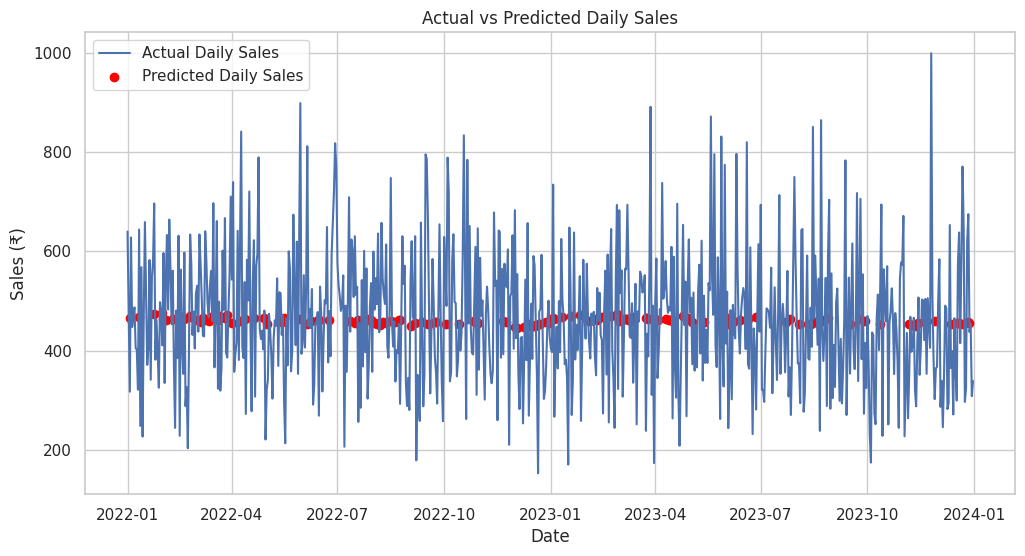

In [37]:
#Visualize Predictions

plt.figure(figsize=(12,6))
plt.plot(daily_sales_data['Order Date'], daily_sales_data['Order Total'], label='Actual Daily Sales')
plt.scatter(daily_sales_data['Order Date'].iloc[features_test.index], predicted_daily_sales, color='red', label='Predicted Daily Sales')
plt.xlabel('Date')
plt.ylabel('Sales (₹)')
plt.title('Actual vs Predicted Daily Sales')
plt.legend()
plt.show()
